Manav Patel

## Introduction 

Here, we will to build a regression model (Linear, Ridge, Lasso and ElasticNet) to most accuartely predict the housing prices in california. We will try to scale and tune the models and compare the same with the original models. We have a dataset 'cal_housing.data' which provides us with the following attributes : 

- Longitude 
- Latitude 
- housing MedianAge 
- Total Rooms 
- Total Bedrooms 
- Population 
- households  
- medianIncome 
- medianHouseValue

In [1]:
#importing the required datasets 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset and adding the column names to it 
df = pd.read_csv('/Users/Lenovo/Desktop/cal_housing.data')

#Adding Column names to the data set 
df.columns=['longitude','latitude','housingMedianAge','totalRooms', 'totalBedrooms', 'population', 'households','medianIncome','medianHouseValue']

In [3]:
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


In [4]:
#Description of the dataset 
df.info()
df.describe().transpose()
##There is no null values as can be seen below 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 9 columns):
longitude           20639 non-null float64
latitude            20639 non-null float64
housingMedianAge    20639 non-null float64
totalRooms          20639 non-null float64
totalBedrooms       20639 non-null float64
population          20639 non-null float64
households          20639 non-null float64
medianIncome        20639 non-null float64
medianHouseValue    20639 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


,count,mean,std,min,25%,50%,75%,max
longitude,20639.0,-119.569576,2.003495,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20639.0,35.631753,2.135947,32.5400,33.9300,34.2600,37.71000,41.9500
housingMedianAge,20639.0,28.638888,12.585568,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20639.0,2635.848152,2181.633870,2.0000,1448.0000,2127.0000,3148.00000,39320.0000
totalBedrooms,20639.0,537.917825,421.248495,1.0000,295.5000,435.0000,647.00000,6445.0000
population,20639.0,1425.530210,1132.463507,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20639.0,499.557779,382.330173,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20639.0,3.870455,1.899615,0.4999,2.5631,3.5347,4.74285,15.0001
medianHouseValue,20639.0,206843.910122,115385.731702,14999.0000,119600.0000,179700.0000,264700.00000,500001.0000


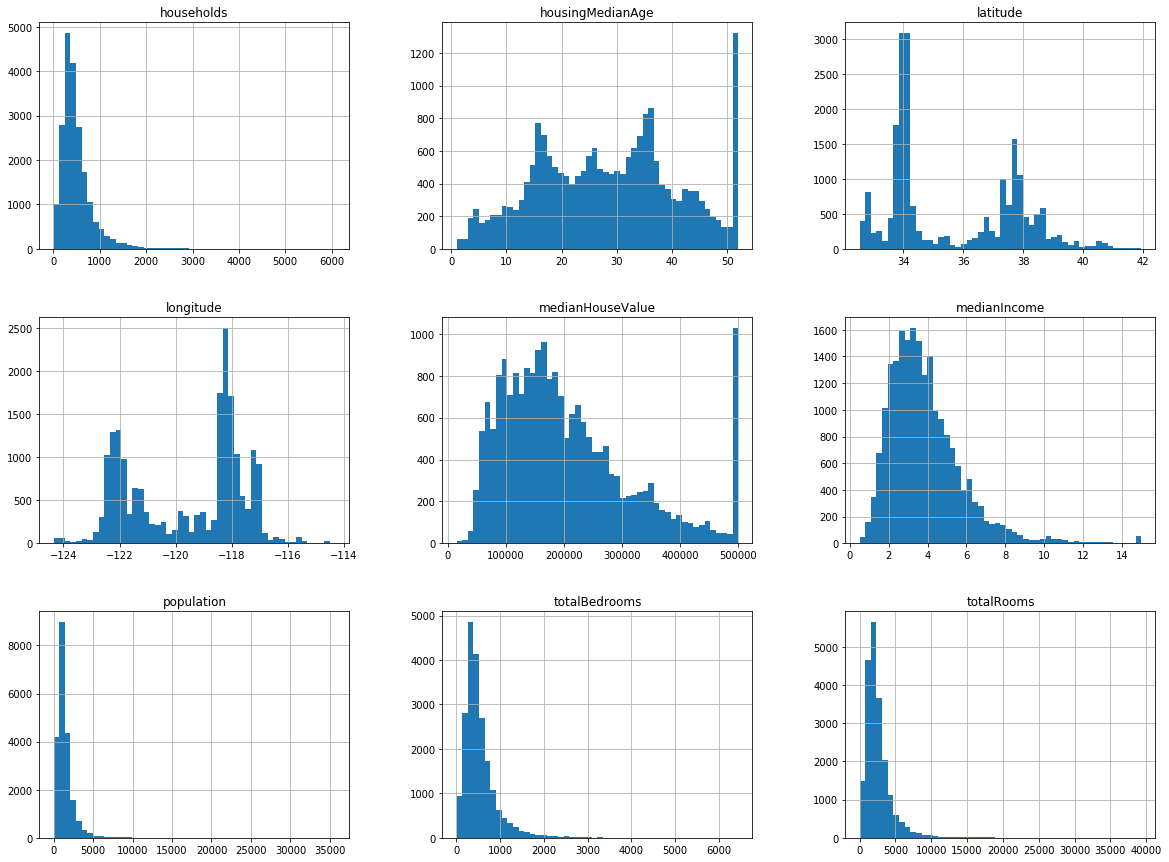

In [5]:
#Histograms of all attributes and their distribution
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

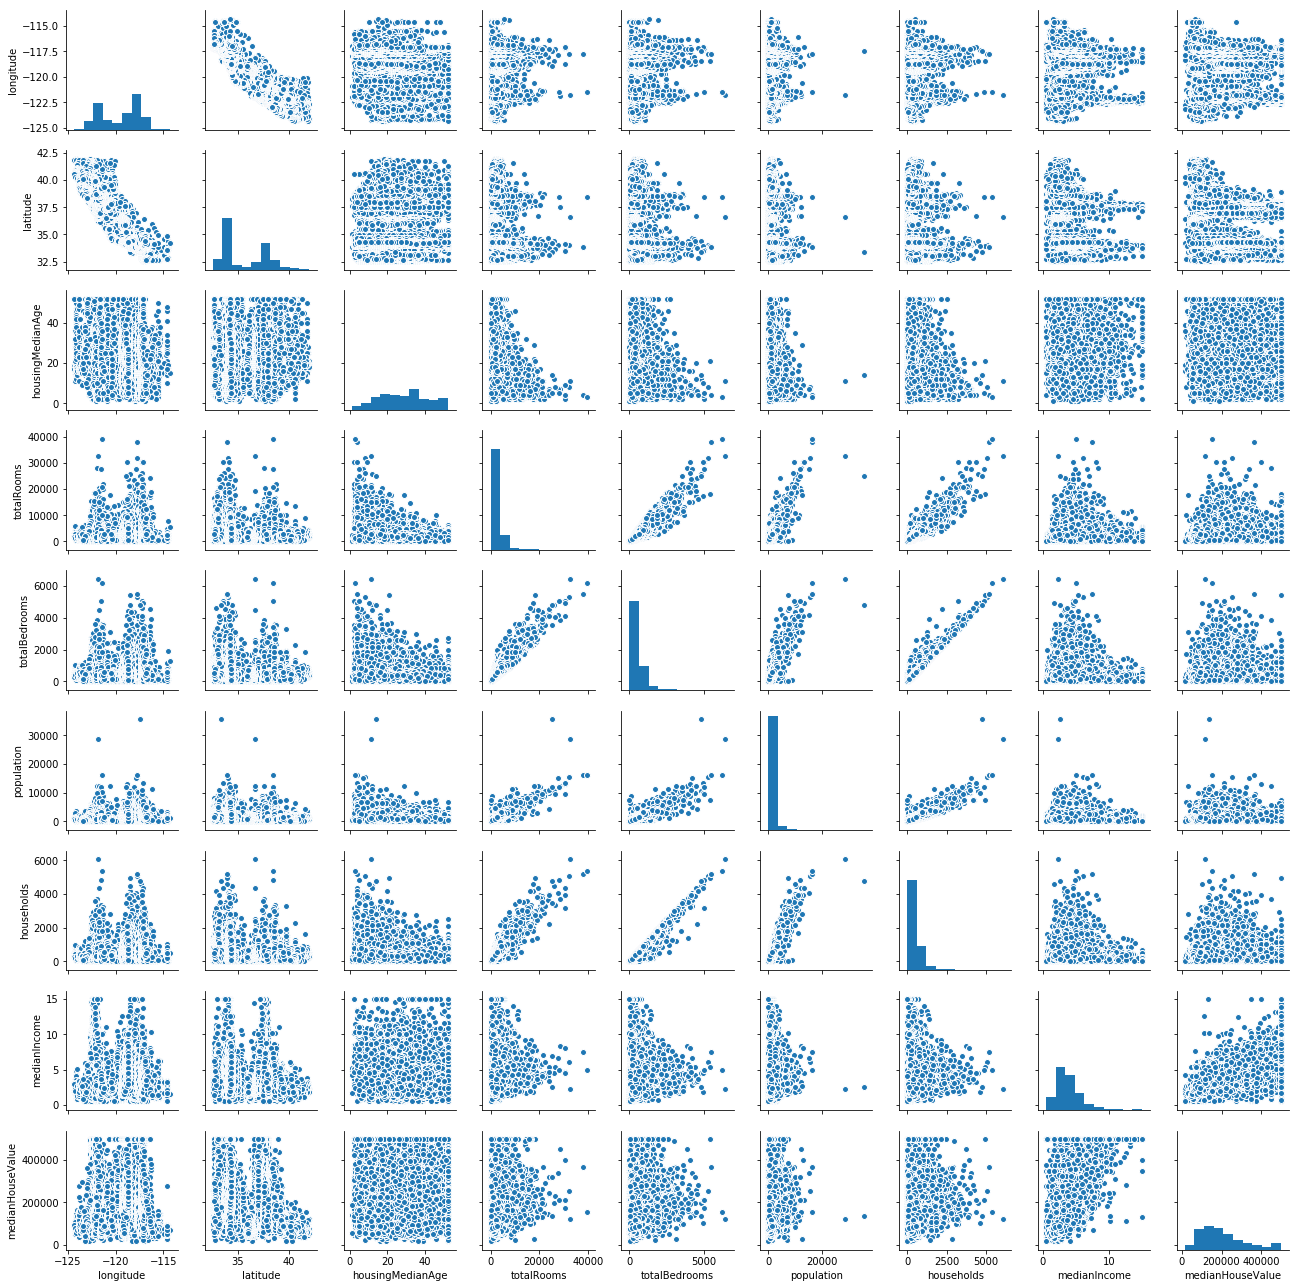

In [6]:
#Pairplots of all atrributes to find correlations between attributes 
sns.pairplot(df, size = 2)
plt.show()

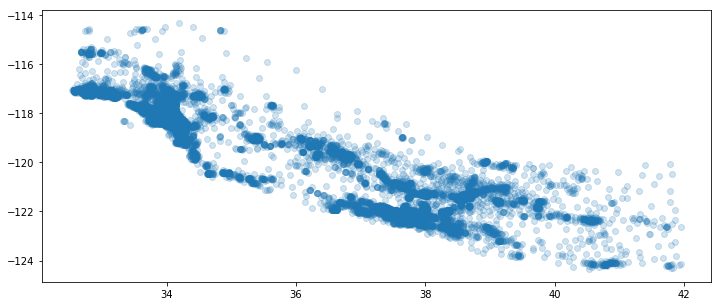

In [33]:
#Scatter plot of longitude and Latitude datapoints 
f, ax = plt.subplots(figsize=(12, 5))
plt.scatter(df['latitude'], df['longitude'], alpha=0.2)

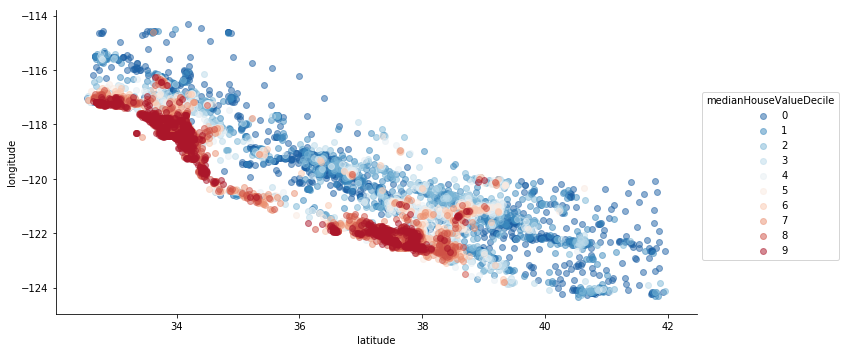

In [34]:
#Scatter plot to observe the density of house value as per location  
df['medianHouseValueDecile'] = pd.qcut(df['medianHouseValue'], 10, labels=np.arange(0, 10, 1))
fg = sns.FacetGrid(data=df, hue='medianHouseValueDecile', palette='RdBu_r', size=5, aspect=2)
fg.map(plt.scatter, 'latitude', 'longitude', alpha=0.5).add_legend()

In [35]:
#Deleting the excess column which was created for the above plot 
df.head()
del df['medianHouseValueDecile']

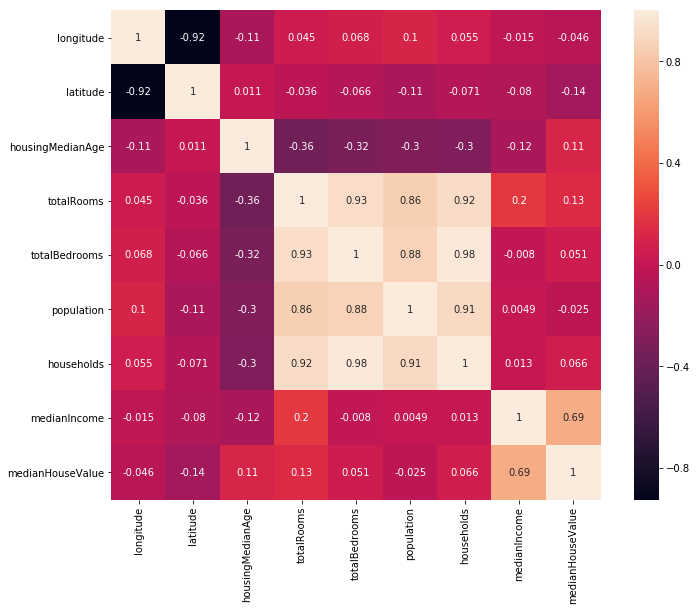

In [36]:
#Correlation numerical plot of all attributes  
corrplot = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrplot, square=True, annot=True);

Most of the data is scattered all over the plot and doesnot show correlation of any kind as can be seen by the pairplots. The househols, totalbedrooms and population are quite correlated as can be seen, which are quite obvious correlations. The target variable medianHouseValue doesnt have high correlation with any of the attributes, but it has a low correlation with the attribute medianIncome.

In [8]:
#Specifying the dependent variables and the target variable and creating separate dataframes
columns=('longitude','latitude','housingMedianAge','totalRooms', 'totalBedrooms', 'population', 'households','medianIncome')
df_new=pd.DataFrame(df, columns= columns)
y = df.medianHouseValue

In [9]:
#Splitting the dataset into train and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_new,y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(16511, 8) (16511,)
(4128, 8) (4128,)


## Models

In [10]:
#Linear Regression model and scores
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model_lm = lm.fit(X_train, y_train)
y_pred = lm.predict(X_train) 

print("R-squared score train: {:.6f}".format(lm.score(X_train, y_train)))
print("R-squared score test: {:.6f}".format(lm.score(X_test, y_test)))
print("Predicted mean - Test mean: ", (np.mean(y_pred)-np.mean(y_test)))

R-squared score train: 0.635293
R-squared score test: 0.642473
Predicted mean - Test mean:  -2041.2159855164646


In [11]:
#Ridge Regression model with scores 
from sklearn.linear_model import Ridge

lm = Ridge(alpha = 0.5).fit(X_train, y_train)
y_pred = lm.predict(X_train)

print("R-squared score train: {:.6f}".format(lm.score(X_train, y_train)))
print("R-squared score test: {:.6f}".format(lm.score(X_test, y_test)))
print("Predicted mean - Test mean: ", (np.mean(y_pred)-np.mean(y_test)))

R-squared score train: 0.635293
R-squared score test: 0.642473
Predicted mean - Test mean:  -2041.2159855170466


In [12]:
#Lasso Regression model with scores 
from sklearn.linear_model import Lasso

lm = Lasso(alpha = 1.0, normalize=True, max_iter=10000).fit(X_train, y_train)
y_pred = lm.predict(X_train)

print("R-squared score train: {:.6f}".format(lm.score(X_train, y_train)))
print("R-squared score test: {:.6f}".format(lm.score(X_test, y_test)))
print("Predicted mean - Test mean: ", (np.mean(y_pred)-np.mean(y_test)))

R-squared score train: 0.635201
R-squared score test: 0.642731
Predicted mean - Test mean:  -2041.2159855168138


In [13]:
#ElasticNet Regression model with scores 
from sklearn.linear_model import ElasticNetCV

lm = ElasticNetCV(cv=5, random_state=0)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

print("R-squared score train: {:.6f}".format(lm.score(X_train, y_train)))
print("R-squared score test: {:.6f}".format(lm.score(X_test, y_test)))
print("Predicted mean - Test mean: ", (np.mean(y_pred)-np.mean(y_test)))

R-squared score train: 0.100038
R-squared score test: 0.090171
Predicted mean - Test mean:  -2041.2159855169302


Other than the ElasticNet model which provides a very low accuracy, the other models linear, ridge and lasso models provides a similar accuracy score of around 65%.

# Scaling and Modelling 

In [14]:
#Linear Regression model Scaled 

from sklearn.preprocessing import MinMaxScaler
#Scaling 
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression model 
lm = LinearRegression().fit(X_train_scaled, y_train)
y_pred = lm.predict(X_train_scaled)

print("R-squared score train: {:.6f}".format(lm.score(X_train_scaled, y_train)))
print("R-squared score test: {:.6f}".format(lm.score(X_test_scaled, y_test)))
print("Predicted mean - Test mean: ", (np.mean(y_pred)-np.mean(y_test)))

R-squared score train: 0.635293
R-squared score test: 0.642473
Predicted mean - Test mean:  -2041.2159855169593


In [15]:
#Ridge Regression model Scaled 
#Scaling
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Ridge Regression model 
lm = Ridge(alpha = 0.2).fit(X_train_scaled, y_train)
y_pred = lm.predict(X_train_scaled)

print("R-squared score train: {:.6f}".format(lm.score(X_train_scaled, y_train)))
print("R-squared score test: {:.6f}".format(lm.score(X_test_scaled, y_test)))
print("Predicted mean - Test mean: ", (np.mean(y_pred)-np.mean(y_test)))

R-squared score train: 0.635204
R-squared score test: 0.643464
Predicted mean - Test mean:  -2041.2159855169302


In [16]:
#Lasso Regression Scaled 
#Scaling
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Lasso Regression model 
lm = Lasso(alpha = 1.0, normalize=True, max_iter=1000).fit(X_train_scaled, y_train)
y_pred = lm.predict(X_train_scaled)

print("R-squared score train: {:.6f}".format(lm.score(X_train_scaled, y_train)))
print("R-squared score test: {:.6f}".format(lm.score(X_test_scaled, y_test)))
print("Predicted mean - Test mean: ", (np.mean(y_pred)-np.mean(y_test)))

R-squared score train: 0.635201
R-squared score test: 0.642731
Predicted mean - Test mean:  -2041.215985516872


In [17]:
#ElasticNetCV Regression Scaled 
#Scaling
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#ElasticNet Regression model 
lm = ElasticNetCV(cv=5, random_state=0)
lm.fit(X_train_scaled, y_train)
ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

print("R-squared score train: {:.6f}".format(lm.score(X_train_scaled, y_train)))
print("R-squared score test: {:.6f}".format(lm.score(X_test_scaled, y_test)))
print("Predicted mean - Test mean: ", (np.mean(y_pred)-np.mean(y_test)))


R-squared score train: 0.001924
R-squared score test: 0.001606
Predicted mean - Test mean:  -2041.215985516872


The ElasticNet which has very low accuracy. We see that Linear, ridge and Lasso Regression models are almost similar in accuracy. The crossvalidation of the regression models help in increasing the accuracy values of the models by a bit.

## Tuning using GridSearchCV

In [18]:
#Linear Regression model with parameter tuning in Gridsearch 
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'fit_intercept': [True, False]}

grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

print("Best Parameters: {}".format(grid_lr.best_params_))
print("Best score: {}".format(grid_lr.best_score_))
print("Test set score: {}".format(grid_lr.score(X_test, y_test)))

Best Parameters: {'fit_intercept': True}
Best score: 0.6343869535943047
Test set score: 0.642473127451471


In [19]:
#Ridge Regression model with parameter tuning in Gridsearch 
param_grid_ridge = {"alpha": np.logspace(-3,3,7)}

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_ridge.fit(X_train, y_train)

print("Best Parameters: {}".format(grid_ridge.best_params_))
print("Best score: {}".format(grid_ridge.best_score_))
print("Test set score: {}".format(grid_ridge.score(X_test, y_test)))

Best Parameters: {'alpha': 1.0}
Best score: 0.6343869667335555
Test set score: 0.6424723446870297


In [20]:
# To ignore the warninigs
import warnings
warnings.filterwarnings("ignore")

#Lasso Regression model with parameter tuning in Gridsearch 
param_grid= {'alpha':np.logspace(-3, 0 , 14),'max_iter': [1, 10, 100, 500, 1000, 2000],'tol': [0.001, 0.0001]}

grid_lasso=GridSearchCV(Lasso(normalize=True, max_iter=1e6),param_grid, cv=10)
grid_lasso.fit(X_train,y_train)

print("Best Parameters: {}".format(grid_lasso.best_params_))
print("Best score: {}".format(grid_lasso.best_score_))
print("Test set score: {}".format(grid_lasso.score(X_test, y_test)))

Best Parameters: {'alpha': 0.04124626382901352, 'max_iter': 100, 'tol': 0.001}
Best score: 0.6343403432646053
Test set score: 0.6422406479185233


In [21]:
#ElasticNet Regression model with parameter tuning in Gridsearch 
from sklearn.linear_model import  ElasticNet

param_grid_elasticnet = {"alpha": np.logspace(-3,3,7),
                        "l1_ratio": [0.01, .1, .5, .9, .98, 1]}

grid_elasticnet = GridSearchCV(ElasticNet(), param_grid_elasticnet, cv=5)
grid_elasticnet.fit(X_train, y_train)

print("Best Parameters: {}".format(grid_elasticnet.best_params_))
print("Best score: {}".format(grid_elasticnet.best_score_))
print("Test set score: {}".format(grid_elasticnet.score(X_test, y_test)))

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Best score: 0.6343869686155891
Test set score: 0.6424718311020728


After parameter tuning every model provides us with a similar accuracy of around 65%.

## ValidationScore v/s Parameter(alpha)

Best cross-validation score: 0.63
Best parameters:  {'fit_intercept': True}


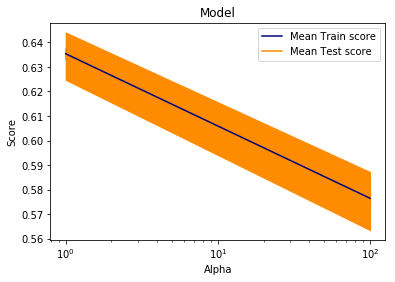

In [22]:
#Linear regression ValidationScore v/s Parameter(alpha)

param_grid= {'fit_intercept': [True, False]}
param_list = []
param_list.append(param_grid)

grid=GridSearchCV(LinearRegression(),param_list, cv=5,return_train_score=True, scoring='r2',n_jobs=-1)
grid.fit(X_train,y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


train_scores_mean = grid.cv_results_["mean_train_score"]
train_scores_std = grid.cv_results_["std_train_score"]
test_scores_mean = grid.cv_results_["mean_test_score"]
test_scores_std = grid.cv_results_["std_test_score"]

alphas = np.logspace(0, 2, num=len(train_scores_mean))

plt.figure()
plt.title('Model')
plt.xlabel('Alpha')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between (mean - std, mean + std)
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between (mean - std, mean + std)
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

{'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])}
Best cross-validation score: 0.63
Best parameters:  {'alpha': 0.001}


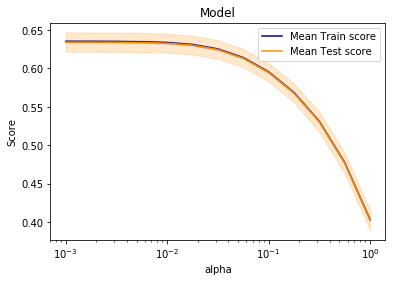

In [23]:
#Ridge regression ValidationScore v/s Parameter(alpha)

param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)
grid = GridSearchCV(Ridge(normalize=True), param_grid,
                    cv=10, return_train_score=True, scoring='r2')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


alphas = np.logspace(-3, 0, 13)

train_scores_mean = grid.cv_results_["mean_train_score"]
train_scores_std = grid.cv_results_["std_train_score"]
test_scores_mean = grid.cv_results_["mean_test_score"]
test_scores_std = grid.cv_results_["std_test_score"]

plt.figure()
plt.title('Model')
plt.xlabel('alpha')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

{'alpha': array([  1.        ,   1.93069773,   3.72759372,   7.19685673,
        13.89495494,  26.82695795,  51.79474679, 100.        ])}
Best cross-validation score: 0.63
Best parameters:  {'alpha': 1.0}


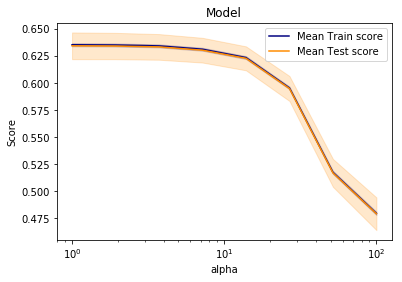

In [24]:
#Lasso regression ValidationScore v/s Parameter(alpha)

param_grid= {'alpha':np.logspace(0, 2, 8)}
print(param_grid)
grid=GridSearchCV(Lasso(normalize=True, max_iter=1e6),param_grid, cv=10,return_train_score=True, scoring='r2')
grid.fit(X_train,y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

alphas = np.logspace(0, 2, 8)

train_scores_mean = grid.cv_results_["mean_train_score"]
train_scores_std = grid.cv_results_["std_train_score"]
test_scores_mean = grid.cv_results_["mean_test_score"]
test_scores_std = grid.cv_results_["std_test_score"]

plt.figure()
plt.title('Model')
plt.xlabel('alpha')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between (mean - std, mean + std)
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between (mean - std, mean + std)
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

{'alpha': array([  1.        ,   1.46779927,   2.15443469,   3.16227766,
         4.64158883,   6.81292069,  10.        ,  14.67799268,
        21.5443469 ,  31.6227766 ,  46.41588834,  68.12920691,
       100.        ]), 'max_iter': [1, 10, 100, 500, 1000, 2000], 'tol': [0.001, 0.0001], 'l1_ratio': [10, 1, 0.1, 0.01, 0.001]}
Best cross-validation score: 0.63
Best parameters:  {'alpha': 1.0, 'l1_ratio': 1, 'max_iter': 500, 'tol': 0.0001}


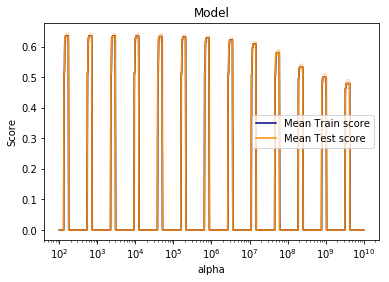

In [27]:
#ElasticNet regression ValidationScore v/s Parameter(alpha)

param_grid= {'alpha': np.logspace(0, 2, 13, 20),'max_iter': [1, 10, 100, 500, 1000, 2000],
    'tol': [0.001, 0.0001],'l1_ratio': [10, 1, 0.1, 0.01, 0.001]}

print(param_grid)
grid=GridSearchCV(ElasticNet(normalize=True, max_iter=1e6),param_grid, cv=10,return_train_score=True, scoring='r2')
grid.fit(X_train,y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

alphas = np.logspace(2, 10, num=len(train_scores_mean))

train_scores_mean = grid.cv_results_["mean_train_score"]
train_scores_std = grid.cv_results_["std_train_score"]
test_scores_mean = grid.cv_results_["mean_test_score"]
test_scores_std = grid.cv_results_["std_test_score"]

plt.figure()
plt.title('Model')
plt.xlabel('alpha')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between (mean - std, mean + std)
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,color='navy')

plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between (mean - std, mean + std)
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

We can observe the effects of alpha on accuracy of all the regression models above. 

## Coefficient Distribution of models 

In [28]:
#Function for estimator and evaluation 
from sklearn.model_selection import cross_val_score

def reg_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(8,5))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    plt.show()

The cross validated accuracy  - 63.43356291371758
The corss validated variance is - 1.2562121527070327


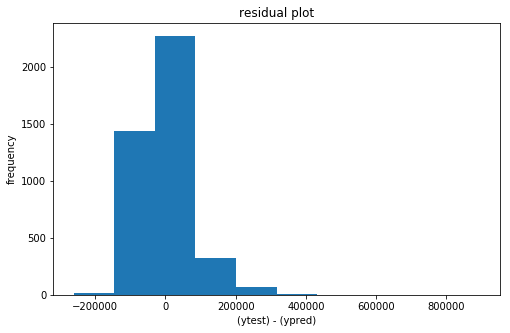

Text(0.5,1,'coeff graph')

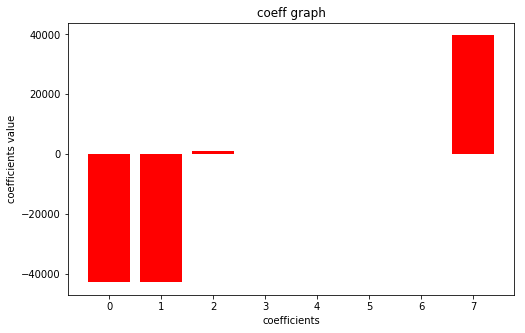

In [29]:
#Linear Regression model coefficient distribution 

lr=reg_model(X_train,y_train,LinearRegression)
evaluate(lr.predict(X_test),y_test,lr)
plt.figure(figsize=(8,5))
plt.bar(np.arange(len(lr.coef_)),lr.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

The cross validated accuracy  - 63.43357087936828
The corss validated variance is - 1.2562710659902165


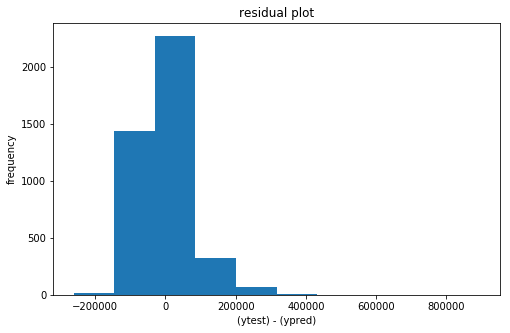

Text(0.5,1,'coeff graph')

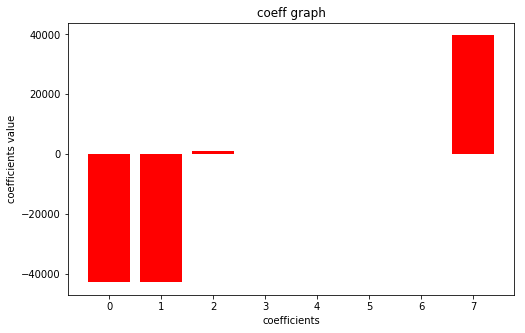

In [30]:
#Ridge Regression model coefficient distribution 

rid=reg_model(X_train,y_train,Ridge)
evaluate(rid.predict(X_test),y_test,rid)
plt.figure(figsize=(8,5))
plt.bar(np.arange(len(rid.coef_)),rid.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

The cross validated accuracy  - 63.433565255016944
The corss validated variance is - 1.2562303811181756


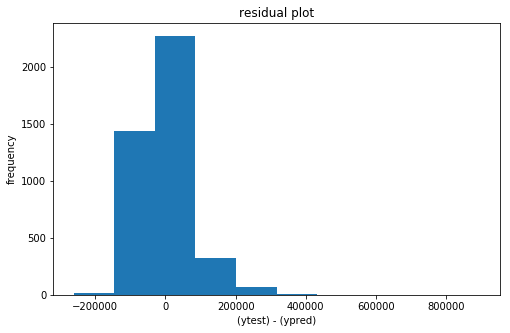

[]

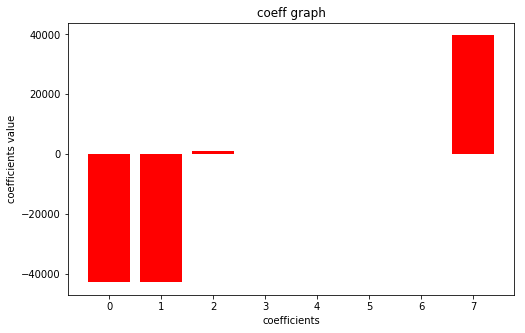

In [31]:
#Lasso Regression coefficient distribution 

las=reg_model(X_train,y_train,Lasso)

evaluate(las.predict(X_test),y_test,las)
plt.figure(figsize=(8,5))

plt.bar(np.arange(len(las.coef_)),las.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')
plt.plot()

The cross validated accuracy  - 59.76225009017111
The corss validated variance is - 1.4216551097450638


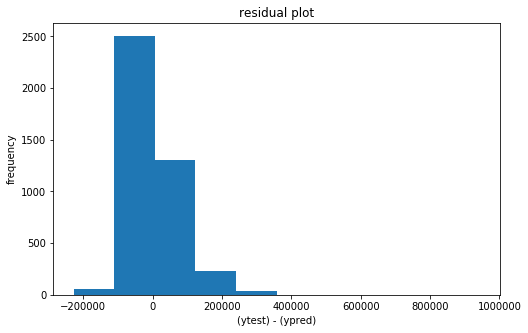

Text(0.5,1,'coeff graph')

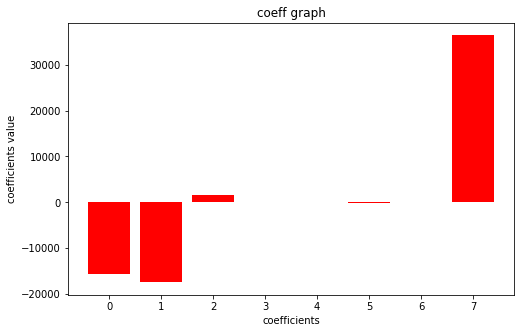

In [32]:
#ElasticNet Regression model coefficient distribution 
from sklearn.linear_model import  ElasticNet

elas=reg_model(X_train,y_train,ElasticNet)
evaluate(elas.predict(X_test),y_test,elas)
plt.figure(figsize=(8,5))
plt.bar(np.arange(len(elas.coef_)),elas.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

## Conclusion 
- Linear, Ridge and Lasso models perform simliar during intial modelling with accuracy of around 63%. ElasticNet doesnot perform well though.
- The performance of each model remains almost the same after scaling and normalizing the data.
- The performance of elasticNet model increases in accuracy after parameter tuning.
- The variation of accuracy with value of alpha and other parameter is shown in the section.
- The Residual and the Coefficient distribution of each model is shown above. 